<a href="https://colab.research.google.com/github/alejandradz98/PDI/blob/master/Circulos_y_Lineas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import os
path='/content/drive/My Drive/PDI/'
os.chdir(path)

In [0]:
def displayGray3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(3,3))
  plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayGray2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()

HOUGH LINEAS

31


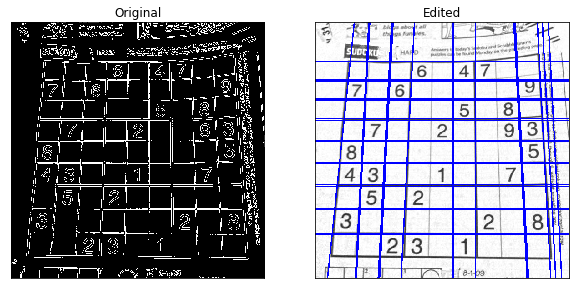

In [15]:
img= cv2.imread("sudoku.png")
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
bordes= cv2.Canny(img_gray,50,200,apertureSize=3)

lineas=cv2.HoughLines(bordes,1,np.pi/60,150)
print(len(lineas))
for i in range(len(lineas)):
  for rho,theta in lineas[i]:
    a=np.cos(theta)
    b=np.sin(theta)
    x0=a*rho
    y0=b*rho
    x1= int(x0+ 1000*(-b))
    y1= int(y0+ 1000*(a))
    x2= int(x0- 1000*(-b))
    y2= int(y0- 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

#cv2.imshow("Bordes...",bordes)
#cv2.imshow("Lineas...",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

    
displayGray2(bordes,img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


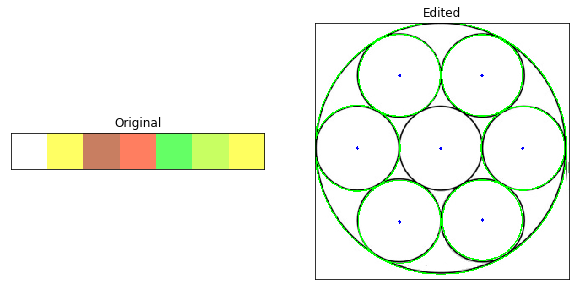

In [21]:
cimg=cv2.imread("8circles.jpg")
img_gray=cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
img=cv2.medianBlur(img_gray,5)

circulos= cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,150,param1=100,param2=30,minRadius=0,maxRadius=0)
circulos=np.uint16(np.around(circulos))

for i in circulos[0,:]:
  cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
  cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
  
displayGray2(circulos,cimg)
  

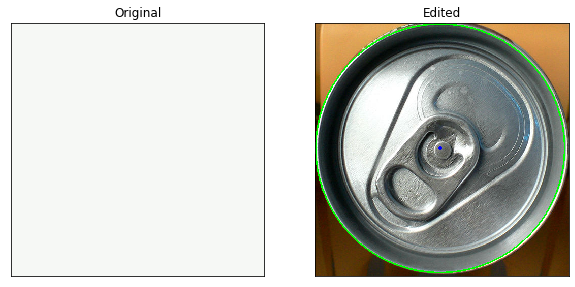

In [25]:
cimg=cv2.imread("circle_soda.png")
img_gray=cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
img=cv2.medianBlur(img_gray,5)

circulos= cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,400,param1=100,param2=30,minRadius=0,maxRadius=0)
circulos=np.uint16(np.around(circulos))

for i in circulos[0,:]:
  cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
  cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
  
displayGray2(circulos,cimg)